# Dataset Exploration

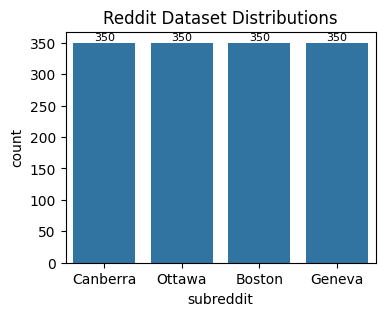

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
train_df = pd.read_csv("train.csv", encoding="latin-1")

# Create the figure and axis
f, ax = plt.subplots(figsize=(4, 3))

# Plot the distributions
ax = sns.countplot(x="subreddit", data=train_df)
ax.set_title("Reddit Dataset Distributions")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

plt.show()

In [ ]:
# Load Data
train_df = pd.read_csv("train.csv", encoding="latin-1")

# Vectorization (Binary Features)
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(train_df['body']).toarray()

selected_words = vectorizer.get_feature_names_out()
print(len(selected_words))

12849


## Data Preprocessing

english stopwords master list: https://github.com/stopwords-iso/stopwords-en/blob/master/stopwords-en.txt

In [ ]:
stopwords_en = [
    "ll", "tis", "twas", "ve", "a", "able", "ableabout", "about", "above", "abroad", "abst", "accordance",
    "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "adopted", "ae", "af", "affected",
    "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ago", "ah", "ahead", "ai", "aint", "aint",
    "al", "all", "allow", "allows", "almost", "alone", "along", "alongside", "already", "also", "although", "always", "am",
    "amid", "amidst", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow",
    "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "apart", "apparently", "appear", "appreciate",
    "appropriate", "approximately", "aq", "ar", "are", "area", "areas", "aren", "arent", "arise", "around", "arpa", "as",
    "aside", "ask", "asked", "asking", "asks", "associated", "at", "auth", "available", "aw", "away", "awfully", "az",
    "b", "ba", "back", "backed", "backing", "backs", "backward", "backwards", "bb", "bd", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "began", "begin", "beginning", "beginnings", "begins", "behind",
    "being", "beings", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bf", "bg", "bh", "bi",
    "big", "bill", "billion", "biol", "bj", "bm", "bn", "bo", "both", "bottom", "br", "brief", "briefly", "bs", "bt", "but",
    "buy", "bv", "bw", "by", "bz", "c", "cmon", "cs", "call", "came", "cannot", "cant", "caption", "case", "cases",
    "cause", "causes", "cc", "cd", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "ck", "cl", "clear", "clearly",
    "click", "cm", "cmon", "cn", "co", "co.", "com", "come", "comes", "computer", "con", "concerning", "consequently", "consider",
    "considering", "contain", "containing", "contains", "copy", "corresponding", "could", "couldve", "couldnt", "course", "cr",
    "cry", "cs", "cu", "currently", "cv", "cx", "cy", "cz", "d", "dare", "daren't", "darent", "date", "de", "dear", "definitely",
    "describe", "described", "despite", "detail", "did", "didnt", "differ", "different", "differently", "directly", "dj", "dk",
    "dm", "do", "does", "doesnt", "doing", "don", "dont", "done", "doubtful", "down", "downed", "downing", "downs", "downwards",
    "due", "during", "dz", "e", "each", "early", "ec", "ed", "edu", "ee", "effect", "eg", "eh", "eight", "eighty", "either",
    "eleven", "else", "elsewhere", "empty", "end", "ended", "ending", "ends", "enough", "entirely", "er", "es", "especially",
    "et", "etal", "etc", "even", "evenly", "ever", "evermore", "every", "everybody", "everyone", "everything", "everywhere", "ex",
    "exactly", "example", "except", "f", "face", "faces", "fact", "facts", "fairly", "far", "farther", "felt", "few", "fewer",
    "ff", "fi", "fifteen", "fifth", "fifty", "fify", "fill", "find", "finds", "fire", "first", "five", "fix", "fj", "fk", "fm",
    "fo", "followed", "following", "follows", "for", "forever", "former", "formerly", "forth", "forty", "forward", "found", "four",
    "fr", "free", "from", "front", "full", "fully", "further", "furthered", "furthering", "furthermore", "furthers", "fx", "g",
    "ga", "gave", "gb", "gd", "ge", "general", "generally", "get", "gets", "getting", "gf", "gg", "gh", "gi", "give", "given",
    "gives", "giving", "gl", "gm", "gmt", "gn", "go", "goes", "going", "gone", "good", "goods", "got", "gotten", "gov", "gp", "gq",
    "gr", "great", "greater", "greatest", "greetings", "group", "grouped", "grouping", "groups", "gs", "gt", "gu", "gw", "gy",
    "h", "had", "hadnt", "half", "happens", "hardly", "has", "hasnt", "have", "haven", "havent", "having", "he", "hed", "hell",
    "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "hers", "herself", "he", "hi",
    "hid", "high", "higher", "highest", "him", "himself", "his", "hither", "home", "homepage", "hopefully", "how", "howd", "howll",
    "hows", "howbeit", "however", "hr", "ht", "htm", "html", "http", "hu", "hundred", "i", "id", "ie", "if", "ignored", "ii",
    "ill", "im", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "inc.", "indeed", "index",
    "indicate", "indicated", "indicates", "information", "inner", "inside", "insofar", "instead", "int", "interest", "interested",
    "interesting", "interests", "into", "invention", "inward", "io", "iq", "ir", "is", "isnt", "it", "itd", "itll", "its", "itself",
    "ive", "je", "jm", "jo", "join", "jp", "just", "k", "ke", "keep", "keeps", "kept", "keys", "kg", "kh", "ki", "kind", "km",
    "kn", "knew", "know", "known", "knows", "kp", "kr", "kw", "ky", "kz", "l", "la", "large", "largely", "last", "lately", "later",
    "latest", "latter", "latterly", "lb", "lc", "least", "length", "less", "let", "lets", "li", "like", "liked", "likely", "line",
    "little", "long", "longer", "longest", "look", "looking", "looks", "low", "lower", "lr", "ls", "lt", "ltd", "lu", "lv", "ly",
    "m", "ma", "made", "mainly", "make", "makes", "making", "man", "many", "may", "maynt", "mc", "md", "me", "mean", "means",
    "meantime", "meanwhile", "member", "members", "men", "merely", "mg", "mh", "microsoft", "might", "mightve", "mightnt", "mil",
    "mill", "million", "mind", "mine", "minus", "miss", "misses", "ml", "mm", "moment", "more", "moreover", "most", "mostly",
    "much", "mucho", "must", "mustnt", "my", "myself", "na", "name", "namely", "nay", "nc", "nd", "near", "nearly", "necessarily",
    "necessary", "need", "needless", "needing", "needs", "neg", "neither", "never", "nevermore", "nevertheless", "new", "newer",
    "newest", "next", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "not", "noted", "nothing",
    "notwithstanding", "novel", "now", "nowadays", "nowhere", "nt", "numerous", "obviously", "of", "off", "offered", "offering",
    "offers", "often", "oh", "okay", "old", "older", "oldest", "om", "omg", "on", "onboard", "once", "one", "ones", "only",
    "onto", "open", "opens", "operate", "opposite", "or", "order", "ordered", "ordering", "orders", "org", "organization",
    "ought", "oughtnt", "our", "ours", "ourselves", "out", "outside", "over", "overall", "overcome", "overlook", "own",
    "owns", "p", "pa", "page", "pages", "part", "particular", "particularly", "partly", "past", "per", "perhaps", "placed",
    "places", "plenty", "point", "pointed", "pointing", "points", "policy", "possibly", "potential", "present", "presently",
    "presumably", "probably", "provides", "q", "question", "questions", "quick", "quickly", "quite", "rather", "really",
    "reason", "reasons", "recent", "recently", "regardless", "regards", "relatively", "respect", "respectively", "right",
    "rightly", "round", "ru", "run", "running", "ry", "s", "said", "same", "saw", "say", "saying", "says", "sc", "second",
    "seconds", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sense", "sensitive", "seriously",
    "seven", "several", "shall", "shallnt", "shan", "shant", "she", "shed", "shell", "shes", "should", "shouldnt", "show",
    "showed", "shown", "shows", "side", "sign", "significant", "similarly", "since", "six", "size", "so", "some", "somebody",
    "somehow", "someone", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically",
    "state", "states", "still", "sub", "subsequently", "such", "summarize", "summary", "suppose", "supposed", "sure", "surely",
    "t", "take", "taken", "takes", "taking", "tell", "tells", "than", "thank", "thanks", "thanx", "that", "thatll", "thats",
    "thatd", "thats", "the", "them", "themselves", "then", "there", "thereafter", "thereby", "therefore", "therein", "there'll",
    "there's", "thereupon", "these", "they", "theyre", "theyll", "this", "thisll", "those", "though", "thoughly", "through",
    "throughout", "thus", "till", "to", "together", "too", "top", "totally", "tough", "toward", "towards", "tried", "tries",
    "truly", "try", "trying", "ts", "thus", "twice", "two", "type", "typically", "u", "un", "under", "unfortunately", "unless",
    "until", "up", "upon", "use", "used", "useful", "uses", "usually", "v", "various", "very", "via", "vid", "view",
    "views", "vs", "w", "wa", "wait", "wants", "was", "wasnt", "wasnt", "we", "wed", "well", "wells", "we'll", "we'd",
    "we've", "we've", "wellll", "went", "were", "weren", "werent", "werent", "we've", "we'll", "willingly", "with", "within",
    "without", "wonder", "wonders", "wont", "words", "work", "worked", "working", "works", "world", "would", "wouldve",
    "wouldnt", "wouldn't", "wrong", "x", "xa", "xe", "xi", "xii", "xiii", "xml", "xrd", "ye", "yea", "yeah", "yet", "you",
    "youll", "you'd", "youre", "youve", "your", "yourself", "yours", "yourself", "yourselves", "z", "zero", "zv",
    "who", "what", "when", "where", "why", "how", "reddit", "r", "www", "http", "https"
]

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import sklearn

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tagging to WordNet POS for better lemmatization."""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ, "N": nltk.corpus.wordnet.NOUN, "V": nltk.corpus.wordnet.VERB, "R": nltk.corpus.wordnet.ADV}
    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[-/\'._"]', ' ', text) # Replace '-', '/', and "'" with space
    text = re.sub(r'[^\w\s]', '', text)# Remove punctuation
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words if word not in stopwords_en]
    return ' '.join(words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
train_df = pd.read_csv("train.csv", encoding="latin-1")

print("\nOriginal:")
print(train_df['body'].iloc[252])
print("\nProcessed:")
print(preprocess_text(train_df['body'].iloc[252]))


Original:
Capital Rubbish Removals will come by and do a quote on what you need gone, or you can probably send them photos. I had them come by this week to quote. I?ve got them coming back next week to pick up a large couch, bbq, outdoor setting, tv and microwave for $290. They will recycle where possible, but are also realistic about what they think Goodies Junction will accept. Office staff have been lovely and they have good star rating. I did have trouble with their online ?request a quote? page, it didn?t go through and I had to ring them. I?ve used them before a couple of years back and they were good then too. They do this all the time and make it easy.

There are other companies that perform similar services, just google ?rubbish removal Canberra?. 

Hope that helps.

Processed:
capital rubbish removal will quote can send photo week quote come week pick couch bbq outdoor set tv microwave will recycle possible realistic think goody junction will accept office staff lovely star 

In [ ]:
# Load Data
train_df = pd.read_csv("train.csv", encoding="latin-1")

# Preprocess
train_df['body'] = train_df['body'].apply(preprocess_text)

# Vectorization (Binary Features)
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(train_df['body']).toarray()

selected_words = vectorizer.get_feature_names_out()
print(len(selected_words))

9730


# Bernoulli Naïve Bayes Class


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


class BernoulliNaiveBayes:

    def __init__(self, alpha=1.0):
        self.alpha = alpha # for LaPlace smoothing
        self.class_priors = {}
        self.feature_probs = {}
        self.classes = None
        self.n_features = None

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)

        n_samples, self.n_features = X.shape

        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # class priors P(y)
        for c in self.classes:
            self.class_priors[c] = np.log(np.sum(y == c) / n_samples)

        # feature probabilities P(x_j|y) with Laplace smoothing
        for c in self.classes:
            # samples for this class
            X_c = X[y == c]
            n_samples_c = X_c.shape[0]

            # feature probabilities for this class
            feature_probs_c = {}

            # for each feature, calculate P(x_j=1|y=c)
            for j in range(self.n_features):
                # number of samples where feature j is present (x_j=1)
                n_feature_present = np.sum(X_c[:, j])

                # Laplace smoothing
                feature_probs_c[j] = (n_feature_present + self.alpha) / (n_samples_c + 2 * self.alpha)

            self.feature_probs[c] = feature_probs_c

       # return self

    def predict(self, X):
        X = np.asarray(X)
        n_samples = X.shape[0]
        predictions = []

        # for each sample
        for i in range(n_samples):
            class_log_probs = {}

            # for each class
            for c in self.classes:
                # start with log class prior
                log_prob = self.class_priors[c]

                # for each feature
                for j in range(self.n_features):
                    # get P(x_j=1|y=c)
                    p_feature_given_class = self.feature_probs[c][j]

                    # If feature is present (x_j=1), add log(P(x_j=1|y=c))
                    # If feature is absent (x_j=0), add log(1-P(x_j=1|y=c))
                    if X[i, j] == 1:
                        log_prob += np.log(p_feature_given_class)
                    else:
                        log_prob += np.log(1 - p_feature_given_class)

                class_log_probs[c] = log_prob

            # select class with highest log probability
            predicted_class = max(class_log_probs, key=class_log_probs.get)
            predictions.append(predicted_class)

        return np.array(predictions)

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

# Multinomial Naive Bayes Class

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.sparse import issparse

class MultinomialNB:

    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.class_log_prior_ = {}
        self.feature_log_prob_ = {}
        self.classes_ = None
        self.n_features_ = None

    def fit(self, X, y):
        X = np.asarray(X)
        if issparse(X):
            X = X.toarray()
        y = np.asarray(y)

        n_samples, self.n_features_ = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)

        # Calculate class prior probabilities
        for c in self.classes_:
            self.class_log_prior_[c] = np.log(np.sum(y == c) / n_samples)

        # Calculate feature probabilities for each class with Laplace smoothing
        for c in self.classes_:
            # Select samples from this class
            X_c = X[y == c]

            # Calculate term frequencies for this class
            feature_count = np.sum(X_c, axis=0)

            # Total count of all features for this class
            total_count = np.sum(feature_count)

            # Apply Laplace smoothing and compute log probabilities
            smoothed_fc = feature_count + self.alpha
            smoothed_total = total_count + self.alpha * self.n_features_

            # Log probabilities for each feature given the class
            self.feature_log_prob_[c] = np.log(smoothed_fc / smoothed_total)

        return self
    def predict(self, X):

        X = np.asarray(X)
        if issparse(X):
            X = X.toarray()

        n_samples = X.shape[0]
        n_classes = len(self.classes_)

        # Initialize log probabilities for each class
        log_probs = np.zeros((n_samples, n_classes))

        # For each class, calculate log probability for each sample
        for i, c in enumerate(self.classes_):
            # Start with class prior log probability
            log_probs[:, i] = self.class_log_prior_[c]

            # Add weighted feature log probabilities
            for j in range(self.n_features_):
                # Weight feature log probability by feature value (term frequency)
                log_probs[:, i] += X[:, j] * self.feature_log_prob_[c][j]

        return self.classes_[np.argmax(log_probs, axis=1)]

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))


# Model Evaluation

Perform K-fold Cross Validation and Evaluate the Models:

- Custom Bernoulli NB
- Custom Multinomial NB
- SciKit Bernoulli
- SciKit Logistic Regression
- SciKit Decision Tree

Evaluate all with and without preprocessing


Bernoulli NB - Accuracy: 0.6307, Time: 181.41 sec
Bernoulli NB (Preprocessed) - Accuracy: 0.6429, Time: 104.16 sec
Multinomial NB - Accuracy: 0.6743, Time: 1.92 sec
Multinomial NB (Preprocessed) - Accuracy: 0.6971, Time: 1.32 sec
Scikit-Learn BernoulliNB - Accuracy: 0.6307, Time: 2.29 sec
Scikit-Learn BernoulliNB (Preprocessed) - Accuracy: 0.6429, Time: 1.70 sec
Logistic Regression - Accuracy: 0.6257, Time: 28.98 sec
Logistic Regression (Preprocessed) - Accuracy: 0.6514, Time: 15.76 sec
Decision Tree - Accuracy: 0.5736, Time: 13.82 sec
Decision Tree (Preprocessed) - Accuracy: 0.5593, Time: 13.76 sec


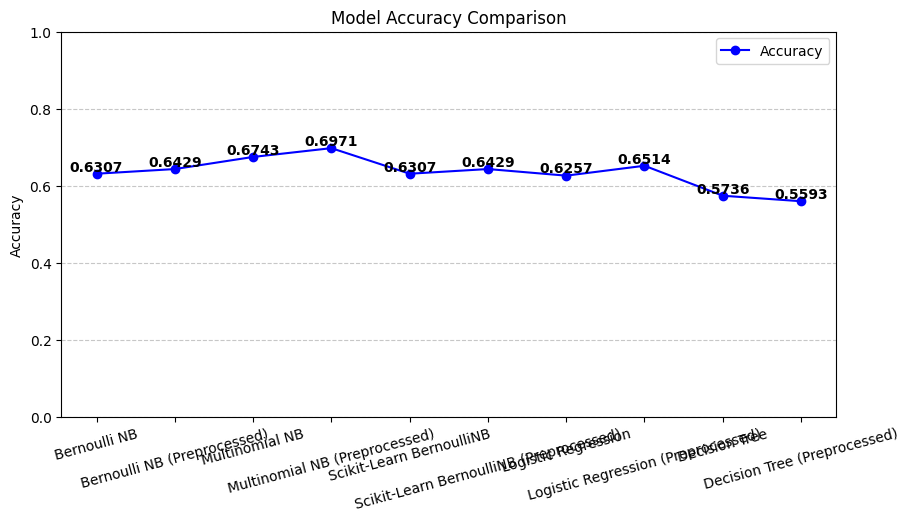

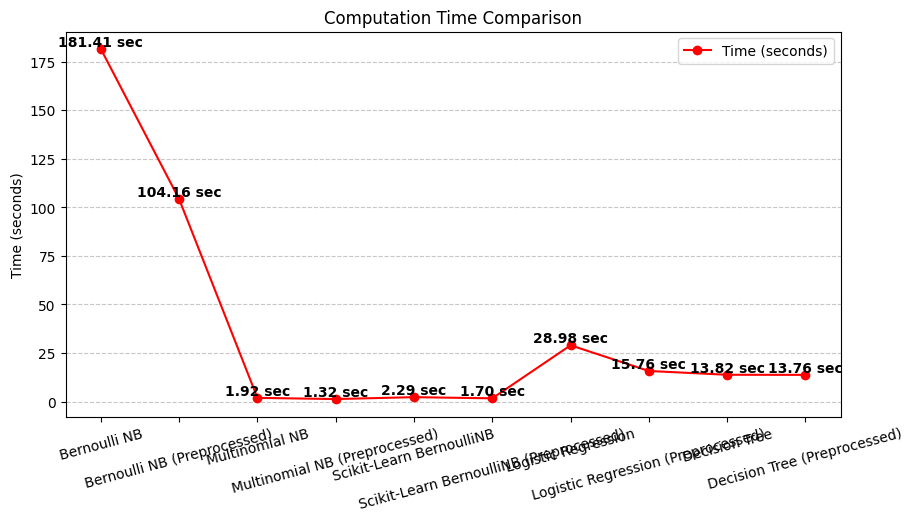

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Load Data
df = pd.read_csv("train.csv", encoding="latin-1")

# Define models and preprocessing settings
models = {
    "Bernoulli NB": BernoulliNaiveBayes(alpha=1.0),
    "Bernoulli NB (Preprocessed)": BernoulliNaiveBayes(alpha=1.0),
    "Multinomial NB": MultinomialNB(alpha=1.0),
    "Multinomial NB (Preprocessed)": MultinomialNB(alpha=1.0),
    "Scikit-Learn BernoulliNB": BernoulliNB(),
    "Scikit-Learn BernoulliNB (Preprocessed)": BernoulliNB(),
    "Logistic Regression": LogisticRegression(),
    "Logistic Regression (Preprocessed)": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Decision Tree (Preprocessed)": DecisionTreeClassifier(random_state=42),
}

# Initialize lists for accuracy and time tracking
accuracies = {}
times = {}

# Define K-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through each model type
for model_name, model in models.items():
    # Copy original text data
    X_text = df["body"].copy()

    # Apply preprocessing if required
    if "Preprocessed" in model_name:
        X_text = X_text.apply(preprocess_text)

    y = df["subreddit"]

    # Convert text to numerical features using CountVectorizer
    vectorizer = CountVectorizer(binary=True)  # Binary form for Bernoulli NB
    X = vectorizer.fit_transform(X_text).toarray()

    # Encode subreddit labels as numerical values
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Track accuracy and time
    model_accuracies = []
    start_time = time.time()

    # Perform KFold cross-validation
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        model_accuracies.append(acc)

    # Store results
    avg_accuracy = np.mean(model_accuracies)
    accuracies[model_name] = avg_accuracy
    times[model_name] = time.time() - start_time

    print(f"{model_name} - Accuracy: {avg_accuracy:.4f}, Time: {times[model_name]:.2f} sec")

# Convert results into lists for plotting
model_names = list(accuracies.keys())
accuracy_values = list(accuracies.values())
time_values = list(times.values())

# Plot Accuracy (Line Graph)
plt.figure(figsize=(10, 5))
plt.plot(model_names, accuracy_values, marker='o', linestyle='-', color='b', label="Accuracy")
for i, txt in enumerate(accuracy_values):
    plt.text(model_names[i], accuracy_values[i], f"{txt:.4f}", ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

# Plot Computation Time (Line Graph)
plt.figure(figsize=(10, 5))
plt.plot(model_names, time_values, marker='o', linestyle='-', color='r', label="Time (seconds)")
for i, txt in enumerate(time_values):
    plt.text(model_names[i], time_values[i], f"{txt:.2f} sec", ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.ylabel("Time (seconds)")
plt.title("Computation Time Comparison")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()


# Model Optimization

**Testing different max features**



Bernoulli Naive Bayes

Max Features: 500, Accuracy: 0.5936
Max Features: 1000, Accuracy: 0.6293
Max Features: 2000, Accuracy: 0.6564
Max Features: 3000, Accuracy: 0.6714
Max Features: 5000, Accuracy: 0.6750
Max Features: 7000, Accuracy: 0.6621
Max Features: 10000, Accuracy: 0.6429
Max Features: 15000, Accuracy: 0.6429

Best max_features: 5000, Best Accuracy: 0.6750


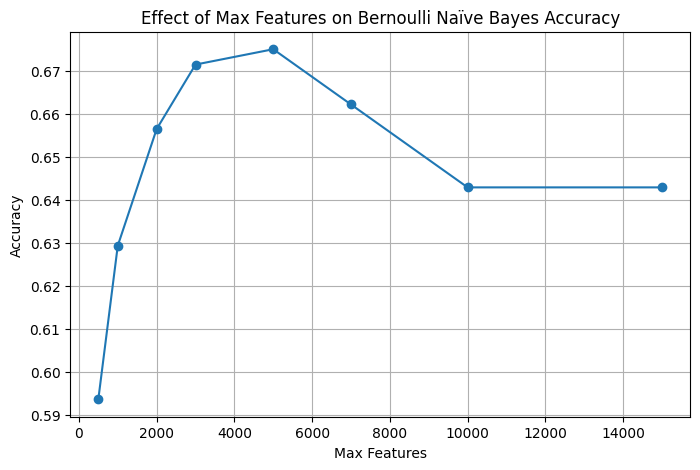

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Load Data
train_df = pd.read_csv("train.csv", encoding="latin-1")
test_df = pd.read_csv("test.csv", encoding="latin-1")

# Preprocess
train_df['body'] = train_df['body'].apply(preprocess_text)
test_df['body'] = test_df['body'].apply(preprocess_text)

# Define hyperparameter search space for max_features
max_features_values = [500, 1000, 2000, 3000, 5000, 7000, 10000, 15000]
best_max_features = None
best_accuracy = 0
feature_accuracies = []

# Perform KFold cross-validation manually
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for max_features in max_features_values:
    # Vectorization (Binary Features with changing max_features)
    vectorizer = CountVectorizer(binary=True, max_features=max_features)
    X = vectorizer.fit_transform(train_df['body']).toarray()
    y = train_df['subreddit'].values

    accuracies = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        nb_model = BernoulliNaiveBayes(alpha=1.0)  # Keep alpha fixed
        nb_model.fit(X_train, y_train)
        y_pred = nb_model.predict(X_val)
        accuracies.append(accuracy_score(y_val, y_pred))

    avg_accuracy = np.mean(accuracies)
    feature_accuracies.append(avg_accuracy)
    print(f"Max Features: {max_features}, Accuracy: {avg_accuracy:.4f}")

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_max_features = max_features

print(f"\nBest max_features: {best_max_features}, Best Accuracy: {best_accuracy:.4f}")

# Plot max_features vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(max_features_values, feature_accuracies, marker='o', linestyle='-')
plt.xlabel("Max Features")
plt.ylabel("Accuracy")
plt.title("Effect of Max Features on Bernoulli Naïve Bayes Accuracy")
plt.grid(True)
plt.show()

Multinomial Naive Bayes

Max Features: 500, Accuracy: 0.5900
Max Features: 1000, Accuracy: 0.6493
Max Features: 2000, Accuracy: 0.6650
Max Features: 3000, Accuracy: 0.6850
Max Features: 5000, Accuracy: 0.6957
Max Features: 7000, Accuracy: 0.6964
Max Features: 10000, Accuracy: 0.6971
Max Features: 15000, Accuracy: 0.6971

Best max_features: 10000, Best Accuracy: 0.6971


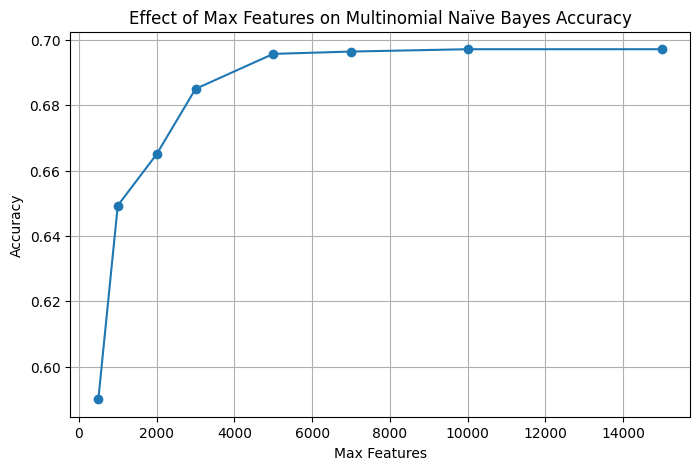

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Load Data
train_df = pd.read_csv("train.csv", encoding="latin-1")
test_df = pd.read_csv("test.csv", encoding="latin-1")

# Preprocess
train_df['body'] = train_df['body'].apply(preprocess_text)
test_df['body'] = test_df['body'].apply(preprocess_text)

# Define hyperparameter search space for max_features
max_features_values = [500, 1000, 2000, 3000, 5000, 7000, 10000, 15000]
best_max_features = None
best_accuracy = 0
feature_accuracies = []

# Perform KFold cross-validation manually
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for max_features in max_features_values:
    # Vectorization (Binary Features with changing max_features)
    vectorizer = CountVectorizer(binary=True, max_features=max_features)
    X = vectorizer.fit_transform(train_df['body']).toarray()
    y = train_df['subreddit'].values

    accuracies = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        nb_model = MultinomialNB(alpha=1.0)  # Keep alpha fixed
        nb_model.fit(X_train, y_train)
        y_pred = nb_model.predict(X_val)
        accuracies.append(accuracy_score(y_val, y_pred))

    avg_accuracy = np.mean(accuracies)
    feature_accuracies.append(avg_accuracy)
    print(f"Max Features: {max_features}, Accuracy: {avg_accuracy:.4f}")

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_max_features = max_features

print(f"\nBest max_features: {best_max_features}, Best Accuracy: {best_accuracy:.4f}")

# Plot max_features vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(max_features_values, feature_accuracies, marker='o', linestyle='-')
plt.xlabel("Max Features")
plt.ylabel("Accuracy")
plt.title("Effect of Max Features on Multinomial Naïve Bayes Accuracy")
plt.grid(True)
plt.show()


**Testing different alpha values**

Bernoulli Naive Bayes

Alpha: 0.01, Accuracy: 0.6843
Alpha: 0.02, Accuracy: 0.6907
Alpha: 0.05, Accuracy: 0.6943
Alpha: 0.075, Accuracy: 0.6950
Alpha: 0.1, Accuracy: 0.6936
Alpha: 0.2, Accuracy: 0.6936
Alpha: 0.5, Accuracy: 0.6914
Alpha: 0.75, Accuracy: 0.6850
Alpha: 1.0, Accuracy: 0.6750
Alpha: 2.0, Accuracy: 0.6464
Alpha: 5.0, Accuracy: 0.5100

Best alpha: 0.075, Best Accuracy: 0.6950


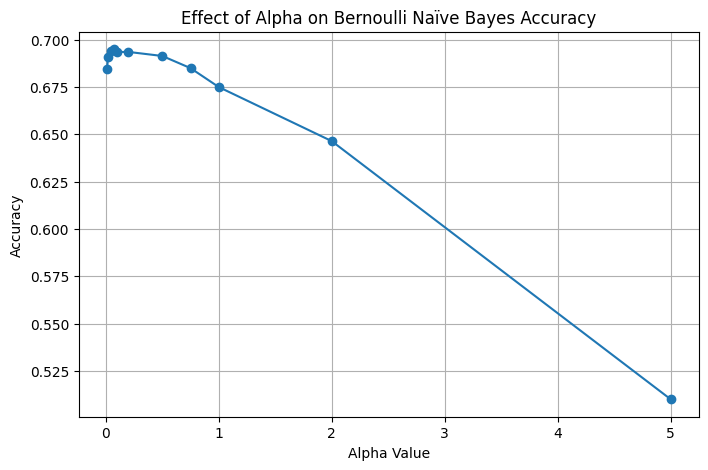

In [ ]:
import matplotlib.pyplot as plt

# Load Data
train_df = pd.read_csv("train.csv", encoding="latin-1")
test_df = pd.read_csv("test.csv", encoding="latin-1")

# Preprocess
train_df['body'] = train_df['body'].apply(preprocess_text)
test_df['body'] = test_df['body'].apply(preprocess_text)

# Vectorization (Binary Features)
vectorizer = CountVectorizer(binary=True, max_features=5000)
X = vectorizer.fit_transform(train_df['body']).toarray()
y = train_df['subreddit'].values

# Define hyperparameter search space
alpha_values = [0.01, 0.02, 0.05, 0.075, 0.1, 0.2, 0.5, 0.75, 1.0, 2.0, 5.0]
best_alpha = None
best_accuracy = 0
alpha_accuracies = []

# Perform KFold cross-validation manually
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alpha_values:
    accuracies = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        nb_model = BernoulliNaiveBayes(alpha=alpha)
        nb_model.fit(X_train, y_train)
        y_pred = nb_model.predict(X_val)
        accuracies.append(accuracy_score(y_val, y_pred))

    avg_accuracy = np.mean(accuracies)
    alpha_accuracies.append(avg_accuracy)
    print(f"Alpha: {alpha}, Accuracy: {avg_accuracy:.4f}")

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_alpha = alpha

print(f"\nBest alpha: {best_alpha}, Best Accuracy: {best_accuracy:.4f}")

# Plot alpha vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(alpha_values, alpha_accuracies, marker='o', linestyle='-')
plt.xlabel("Alpha Value")
plt.ylabel("Accuracy")
plt.title("Effect of Alpha on Bernoulli Naïve Bayes Accuracy")
plt.grid(True)
plt.show()



Multinomial Naive Bayes

Alpha: 0.01, Accuracy: 0.6771
Alpha: 0.02, Accuracy: 0.6864
Alpha: 0.05, Accuracy: 0.6936
Alpha: 0.075, Accuracy: 0.6971
Alpha: 0.1, Accuracy: 0.6943
Alpha: 0.2, Accuracy: 0.6950
Alpha: 0.5, Accuracy: 0.6964
Alpha: 0.75, Accuracy: 0.6964
Alpha: 1.0, Accuracy: 0.6971
Alpha: 2.0, Accuracy: 0.6950
Alpha: 5.0, Accuracy: 0.6850

Best alpha: 0.075, Best Accuracy: 0.6971


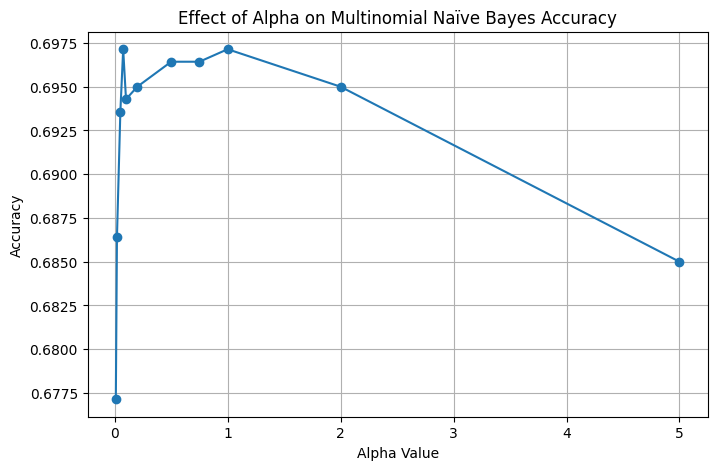

In [ ]:
import matplotlib.pyplot as plt

# Load Data
train_df = pd.read_csv("train.csv", encoding="latin-1")
test_df = pd.read_csv("test.csv", encoding="latin-1")

# Preprocess
train_df['body'] = train_df['body'].apply(preprocess_text)
test_df['body'] = test_df['body'].apply(preprocess_text)

# Vectorization (Binary Features)
vectorizer = CountVectorizer(binary=True, max_features=10000)
X = vectorizer.fit_transform(train_df['body']).toarray()
y = train_df['subreddit'].values

# Define hyperparameter search space
alpha_values = [0.01, 0.02, 0.05, 0.075, 0.1, 0.2, 0.5, 0.75, 1.0, 2.0, 5.0]
best_alpha = None
best_accuracy = 0
alpha_accuracies = []

# Perform KFold cross-validation manually
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alpha_values:
    accuracies = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        nb_model = MultinomialNB(alpha=alpha)
        nb_model.fit(X_train, y_train)
        y_pred = nb_model.predict(X_val)
        accuracies.append(accuracy_score(y_val, y_pred))

    avg_accuracy = np.mean(accuracies)
    alpha_accuracies.append(avg_accuracy)
    print(f"Alpha: {alpha}, Accuracy: {avg_accuracy:.4f}")

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_alpha = alpha

print(f"\nBest alpha: {best_alpha}, Best Accuracy: {best_accuracy:.4f}")

# Plot alpha vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(alpha_values, alpha_accuracies, marker='o', linestyle='-')
plt.xlabel("Alpha Value")
plt.ylabel("Accuracy")
plt.title("Effect of Alpha on Multinomial Naïve Bayes Accuracy")
plt.grid(True)
plt.show()



**Vectorizer Experiments**


--- Binary Vectorization ---
BernoulliNB (Binary) Accuracy: 0.6950
MultinomialNB (Binary) Accuracy: 0.6971

--- Count Vectorization ---
BernoulliNB (Count) Accuracy: 0.6950
MultinomialNB (Count) Accuracy: 0.7014

--- TF-IDF Vectorization ---
BernoulliNB (TF-IDF) Accuracy: 0.6950
MultinomialNB (TF-IDF) Accuracy: 0.7086


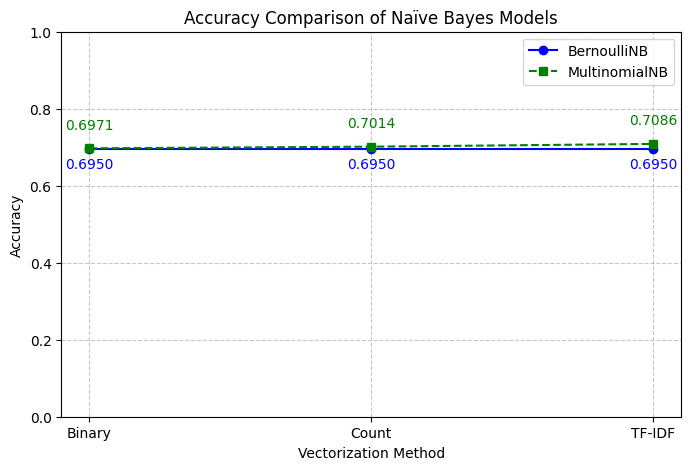

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

# Load Data
train_df = pd.read_csv("train.csv", encoding="latin-1")
test_df = pd.read_csv("test.csv", encoding="latin-1")

# Preprocess
train_df['body'] = train_df['body'].apply(preprocess_text)
test_df['body'] = test_df['body'].apply(preprocess_text)

# Define hyperparameters
alpha = 0.075
max_features_bernoulli = 5000
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Run Experiments ---
vectorizers = {
    "Binary": CountVectorizer(binary=True),
    "Count": CountVectorizer(binary=False),
    "TF-IDF": TfidfVectorizer()
}

accuracies_bernoulli = {}
accuracies_multinomial = {}

for vec_name, vectorizer in vectorizers.items():
    print(f"\n--- {vec_name} Vectorization ---")

    # BernoulliNB (with max_features limit)
    if vec_name == "Binary" or vec_name == "Count":
        vectorizer_bernoulli = CountVectorizer(binary=(vec_name == "Binary"), max_features=max_features_bernoulli)
    else:
        vectorizer_bernoulli = TfidfVectorizer(max_features=max_features_bernoulli)

    X_bernoulli = vectorizer_bernoulli.fit_transform(train_df['body']).toarray()
    y = train_df['subreddit'].values

    accuracies_bernoulli[vec_name] = []
    for train_index, val_index in kf.split(X_bernoulli):
        X_train, X_val = X_bernoulli[train_index], X_bernoulli[val_index]
        y_train, y_val = y[train_index], y[val_index]

        nb_model = BernoulliNB(alpha=alpha)
        nb_model.fit(X_train, y_train)
        y_pred = nb_model.predict(X_val)
        accuracies_bernoulli[vec_name].append(accuracy_score(y_val, y_pred))

    print(f"BernoulliNB ({vec_name}) Accuracy: {np.mean(accuracies_bernoulli[vec_name]):.4f}")

    # MultinomialNB (no max_features limit)
    vectorizer_multinomial = vectorizer
    X_multinomial = vectorizer_multinomial.fit_transform(train_df['body']).toarray()

    accuracies_multinomial[vec_name] = []
    for train_index, val_index in kf.split(X_multinomial):
        X_train, X_val = X_multinomial[train_index], X_multinomial[val_index]
        y_train, y_val = y[train_index], y[val_index]

        nb_model = MultinomialNB(alpha=alpha)
        nb_model.fit(X_train, y_train)
        y_pred = nb_model.predict(X_val)
        accuracies_multinomial[vec_name].append(accuracy_score(y_val, y_pred))

    print(f"MultinomialNB ({vec_name}) Accuracy: {np.mean(accuracies_multinomial[vec_name]):.4f}")

# --- Plot the results as a Line Plot ---
labels = list(vectorizers.keys())  # ["Binary", "Count", "TF-IDF"]
bernoulli_means = [np.mean(accuracies_bernoulli[label]) for label in labels]
multinomial_means = [np.mean(accuracies_multinomial[label]) for label in labels]

plt.figure(figsize=(8, 5))
plt.plot(labels, bernoulli_means, marker="o", linestyle="-", label="BernoulliNB", color="blue")
plt.plot(labels, multinomial_means, marker="s", linestyle="--", label="MultinomialNB", color="green")

# Add text labels
for i, label in enumerate(labels):
    plt.text(i, bernoulli_means[i] - 0.05, f"{bernoulli_means[i]:.4f}", ha="center", fontsize=10, color="blue")
    plt.text(i, multinomial_means[i] + 0.05, f"{multinomial_means[i]:.4f}", ha="center", fontsize=10, color="green")

plt.ylim(0, 1)
plt.xlabel("Vectorization Method")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Naïve Bayes Models")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Submission Generation




**Best Model, Bernoulli Naive Bayes**

In [ ]:
train_df = pd.read_csv("train.csv", encoding="latin-1")
test_df = pd.read_csv("test.csv", encoding="latin-1")

train_df['body'] = train_df['body'].apply(preprocess_text)
test_df['body'] = test_df['body'].apply(preprocess_text)

vectorizer = CountVectorizer(binary=True, max_features=5000)
X = vectorizer.fit_transform(train_df['body']).toarray()
y = train_df['subreddit'].values

model = BernoulliNaiveBayes(alpha=0.075)
model.fit(X, y)

X_test = vectorizer.transform(test_df['body']).toarray()
test_df['subreddit'] = model.predict(X_test)

# Save submission file
submission = test_df[['id', 'subreddit']]
submission.to_csv("submission.csv", index=False)

*this scored 0.6777 on the test set on kaggle*

**Best Model, Multinomial Naive Bayes**


In [ ]:
train_df = pd.read_csv("train.csv", encoding="latin-1")
test_df = pd.read_csv("test.csv", encoding="latin-1")

train_df['body'] = train_df['body'].apply(preprocess_text)
test_df['body'] = test_df['body'].apply(preprocess_text)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_df['body']).toarray()
y = train_df['subreddit'].values

model = MultinomialNB(alpha=0.075)
model.fit(X, y)

X_test = vectorizer.transform(test_df['body']).toarray()
test_df['subreddit'] = model.predict(X_test)

# Save submission file
submission = test_df[['id', 'subreddit']]
submission.to_csv("submission.csv", index=False)

*this scored 0.6833 on the test set on kaggle*

(functions to get code in pdf form)

In [ ]:
!apt-get install -y pandoc
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf  "/content/drive/My Drive/Colab Notebooks/ECSE551/ECSE551-Assignment 2.ipynb"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc texlive-latex-extra
  context wkhtmltopdf librsvg2-bin groff ghc nodejs php python ruby libjs-mathjax libjs-katex
  citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 29 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]
